In [ ]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
# Importing the dataset 
dataset = pd.read_csv('/content/Social_Network_Ads.csv')  
dataset=dataset.drop(columns=['User ID'])
dataset['Gender'] = dataset['Gender'].replace({'Female': 0, 'Male': 1})


# store feature matrix in "X"
X = dataset.iloc[ : , :-1]

# store response vector in "y"
y = dataset.iloc[ : ,-1]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


K-nearest neighbors (KNN) classification

Pick a value for K.

Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.

Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

In [ ]:
#Step 1: Import the class you plan to use
from sklearn.neighbors import KNeighborsClassifier

OR

step 2: "Instantiate" the "estimator"

"Estimator" is scikit-learn's term for model

"Instantiate" means "make an instance of"

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

Step 3: Fit the model with data (aka "model training")

Model is learning the relationship between X and y
Occurs in-place

In [ ]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Step 4: Predict the response for a new observation

New observations are called "out-of-sample" data
Uses the information it learned during the model training process

In [ ]:
knn.predict([[0, 32, 150000]])

array([1])

Returns a NumPy array

Can predict for multiple observations at once

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict([[0, 48, 29000]])

array([1])

Comparing machine learning models in scikit-learn¶

In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9025


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.8725


Evaluation procedure #2: Train/test split

Split the dataset into two pieces: a training set and a testing set.
    
Train the model on the training set.

Test the model on the testing set, and evaluate how well we did.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8375


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.815


In [ ]:
from sklearn.model_selection import cross_val_score
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7975000000000001, 0.79, 0.7900000000000001, 0.7925, 0.7849999999999999, 0.7825, 0.7925, 0.785, 0.7849999999999999, 0.76, 0.78, 0.7850000000000001, 0.7899999999999999, 0.78, 0.7725000000000001, 0.7675, 0.7625, 0.7775000000000001, 0.77, 0.7725, 0.7700000000000001, 0.7775000000000001, 0.7700000000000001, 0.7775000000000001, 0.7825000000000001, 0.7925000000000001, 0.785, 0.775, 0.77, 0.7775000000000001]


Text(0, 0.5, 'Cross-Validated Accuracy')

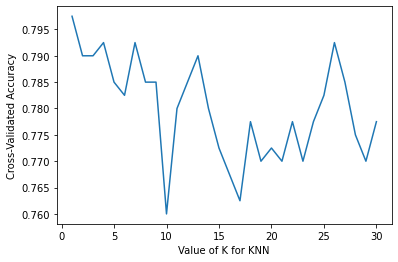

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')